### DECISION TREES

In [396]:
import sys
sys.path.append("..")

import mglearn
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [397]:
path = '/Users/francescavasta/Desktop/ADSEM/II YEAR I SEM/UE 2 - Machine Learning /Machine Learning - TAXI PROJECT/data_clean.csv'
df_original = pd.read_csv(path)

In [398]:
# Overview of variables and NAs
list(df_original)
df_original.info()
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       891 non-null    float64
 1   Time_of_Day            891 non-null    object 
 2   Day_of_Week            891 non-null    object 
 3   Passenger_Count        891 non-null    float64
 4   Traffic_Conditions     891 non-null    object 
 5   Weather                891 non-null    object 
 6   Base_Fare              891 non-null    float64
 7   Per_Km_Rate            891 non-null    float64
 8   Per_Minute_Rate        891 non-null    float64
 9   Trip_Duration_Minutes  891 non-null    float64
 10  Trip_Price             891 non-null    float64
 11  Trip_Distance_km_log   891 non-null    float64
 12  Trip_Price_log         891 non-null    float64
dtypes: float64(9), object(4)
memory usage: 90.6+ KB


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Trip_Price_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,27.147463,2.501684,3.507757,1.236164,0.294133,62.044484,55.161060,3.072440,3.897835
std,20.092188,1.078257,0.852377,0.432933,0.124971,32.181079,31.970690,0.797767,0.561122
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900,0.802002,1.963876
25%,12.500000,2.000000,2.760000,0.860000,0.190000,35.540000,33.742650,2.602650,3.547968
50%,25.920000,3.000000,3.500522,1.220000,0.290000,62.010000,50.241200,3.292870,3.936544
75%,38.720000,3.000000,4.210000,1.620000,0.390000,88.520000,69.195500,3.681855,4.251284
max,146.067047,4.000000,5.000000,2.000000,1.732901,119.840000,283.645201,4.990889,5.808274


In [399]:
# Create a copy to avoid modifying the original dataframe
df_linear_model = df_original.copy()

# Drop the original non-log transformed columns
#df_linear_model = df_linear_model.drop(['Trip_Distance_km', 'Trip_Price'], axis=1)

# Drop the original log transformed columns (because the log trasformation might interfere with outliers identification)
df_linear_model = df_linear_model.drop(['Trip_Distance_km_log', 'Trip_Price_log'], axis=1)

In [400]:
from sklearn.preprocessing import LabelEncoder

# Set up the encoder
encoder = LabelEncoder()

# Create dummy variables for categorical columns
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Create dummies and drop first category for each variable
for column in categorical_columns:
    df_linear_model[column] = encoder.fit_transform(df_linear_model[column])

df_linear_model.info()
df_linear_model.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       891 non-null    float64
 1   Time_of_Day            891 non-null    int64  
 2   Day_of_Week            891 non-null    int64  
 3   Passenger_Count        891 non-null    float64
 4   Traffic_Conditions     891 non-null    int64  
 5   Weather                891 non-null    int64  
 6   Base_Fare              891 non-null    float64
 7   Per_Km_Rate            891 non-null    float64
 8   Per_Minute_Rate        891 non-null    float64
 9   Trip_Duration_Minutes  891 non-null    float64
 10  Trip_Price             891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,1,0,3.56,0.80,0.32,53.82,36.2624
1,36.87,1,1,1.0,0,0,2.70,1.21,0.15,37.27,52.9032
2,30.33,1,0,4.0,1,0,3.48,0.51,0.15,116.81,36.4698
3,8.64,0,1,2.0,2,0,2.55,1.71,0.48,89.33,60.2028
4,3.85,0,0,4.0,0,1,3.51,1.66,0.27,5.05,11.2645


In [401]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for column in categorical_columns:
    print(f"Mapping for the column '{column}':\n", mapping)

Mapping for the column 'Time_of_Day':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}
Mapping for the column 'Day_of_Week':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}
Mapping for the column 'Traffic_Conditions':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}
Mapping for the column 'Weather':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}


In [402]:
#Scale numerical features only (not using log)
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


#set the scaler 
scaler = StandardScaler()
df_model_scaled = df_linear_model.copy()
df_model_scaled[numerical_columns] = scaler.fit_transform(df_linear_model[numerical_columns])

X = df_model_scaled.drop('Trip_Price', axis=1)
y = df_model_scaled['Trip_Price']




In [403]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

In [404]:
# --- Case 1: No specified depth of the tree ---

# Instantiate the model
model_1 = DecisionTreeRegressor(random_state=0)

# Note: here we do not specify the depth of the tree, so nodes are expanded until all leaves are pure
# or until all leaves contain less than min_samples_split observations (default=2)

# Fit the model
model_1.fit(X_train, y_train)

# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(model_1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_1.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.894


In [405]:
# depth of the tree
print("Depth of the tree: ", model_1.get_depth())

# Number of nodes
print("Number of nodes in the tree: ", model_1.get_n_leaves())

# other parameters
print("Number of features used: ", model_1.n_features_in_)


Depth of the tree:  17
Number of nodes in the tree:  712
Number of features used:  10


In [406]:
#Impurity of Nodes and of Leaves 
impurity_values = model_1.tree_.impurity
average_impurity = np.mean(impurity_values)

# Extract impurity values of only the leaf nodes
# Identify leaf nodes (leaf nodes have children_left and children_right as -1)
leaf_mask = (model_1.tree_.children_left == -1) & (model_1.tree_.children_right == -1)
leaf_impurity_values = impurity_values[leaf_mask]
average_leaf_impurity = np.mean(leaf_impurity_values)

# Print the average impurity
print("Average Impurity of the Tree nodes: {:.4f}".format(average_impurity))
print("Average Impurity of Leaf Nodes: {:.4f}".format(average_leaf_impurity))

Average Impurity of the Tree nodes: 0.0126
Average Impurity of Leaf Nodes: -0.0000


Feature importances:
[6.55976338e-01 1.70522811e-03 6.94320106e-04 1.39980909e-03
 6.56314486e-04 6.47173379e-05 6.10472523e-03 1.94492104e-01
 5.96433038e-02 7.92631401e-02]


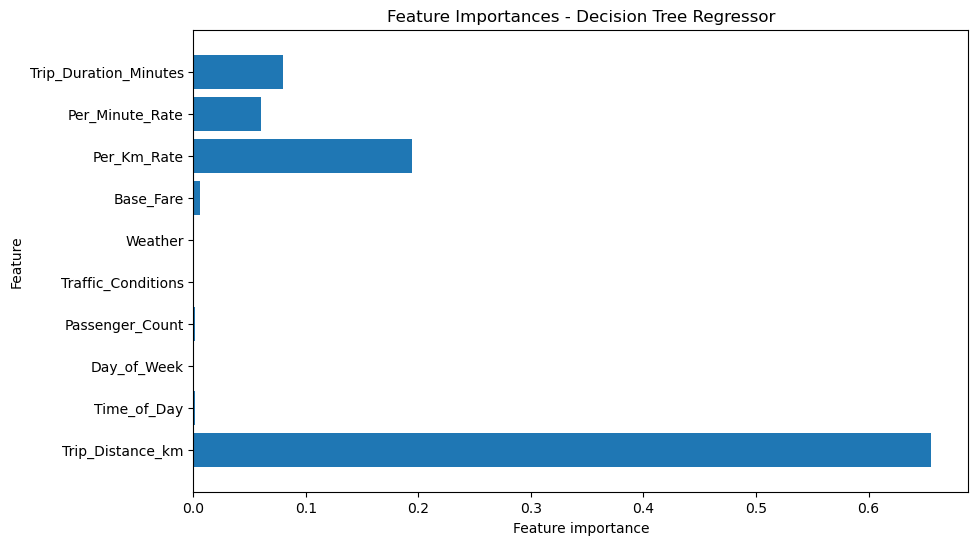

In [407]:
# Report the feature importances
print("Feature importances:")
print(model_1.feature_importances_)

# function to plot feature importances 
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)  # Per visualizzare tutte le feature
    plt.title("Feature Importances - Decision Tree Regressor")
    plt.show()

# Plot feature importances using the column labels of  X_train
plot_feature_importances(model_1, X_train.columns)

In [408]:
# Report delle feature importances con nomi
feature_importances = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": model_1.feature_importances_}
).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                 Feature  Importance
0       Trip_Distance_km    0.655976
7            Per_Km_Rate    0.194492
9  Trip_Duration_Minutes    0.079263
8        Per_Minute_Rate    0.059643
6              Base_Fare    0.006105
1            Time_of_Day    0.001705
3        Passenger_Count    0.001400
2            Day_of_Week    0.000694
4     Traffic_Conditions    0.000656
5                Weather    0.000065


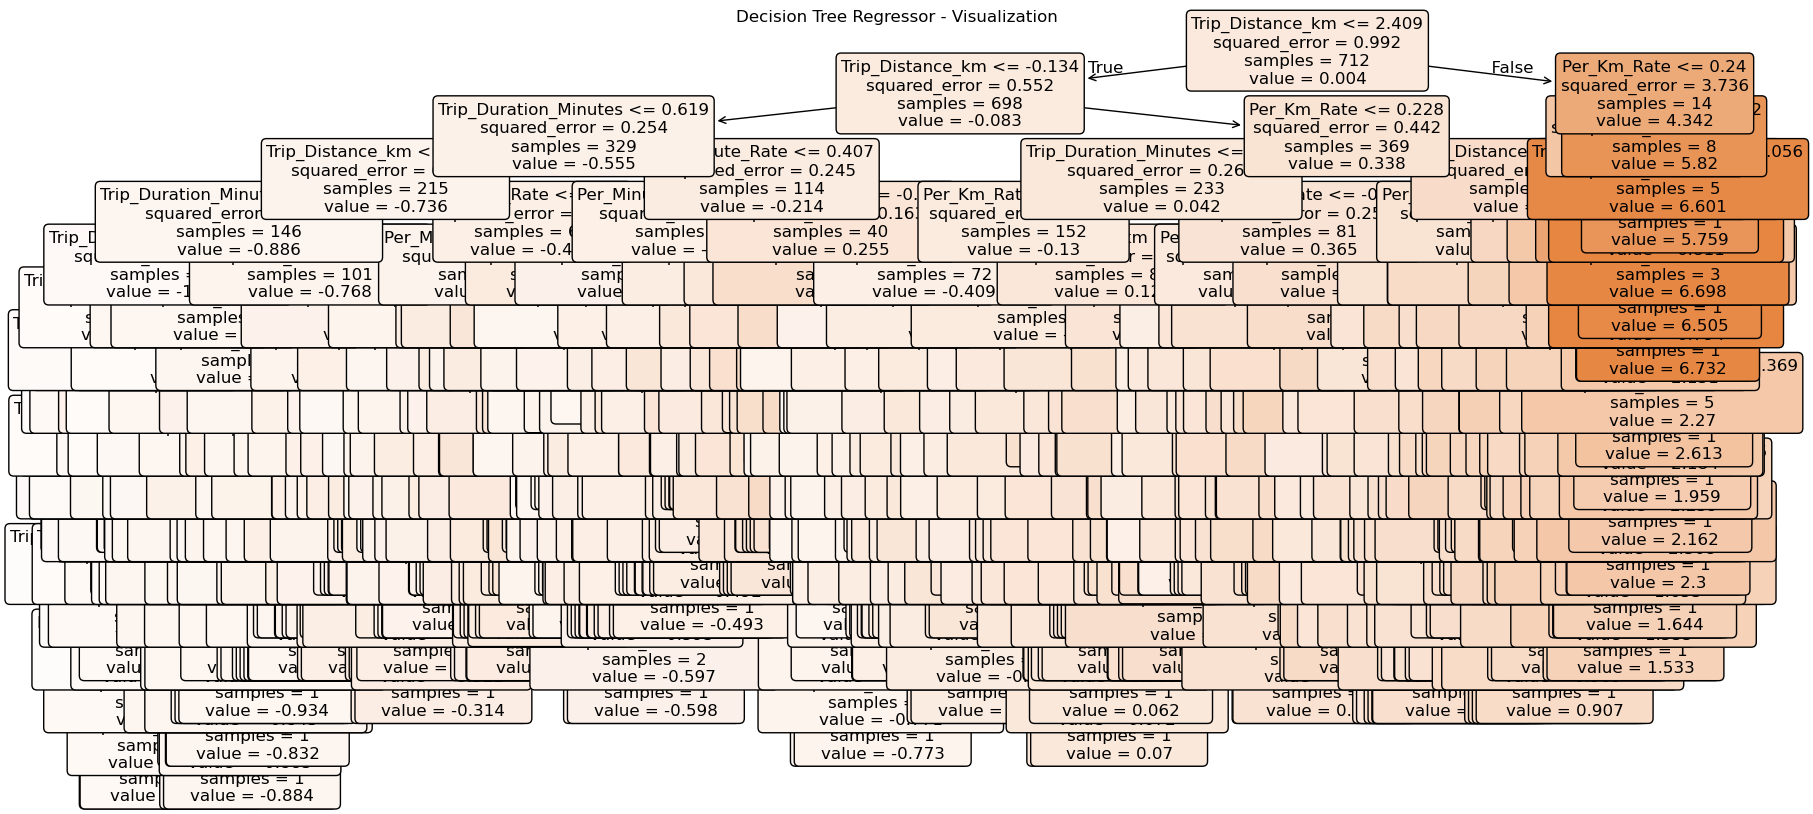

In [409]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(model_1,  
          filled=True,  
          feature_names=X_train.columns, 
          rounded=True,  
          fontsize=12)  #set up font size
plt.title("Decision Tree Regressor - Visualization")
plt.show()

In [410]:
# --- Case 2: Fixed depth of the tree ---

# Instantiate the model and specify the maximum depth
model_2 = DecisionTreeRegressor(max_depth=4, random_state=0)

# Fit the model
model_2.fit(X_train, y_train)
 
# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(model_2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_2.score(X_test, y_test)))

Accuracy on training set: 0.842
Accuracy on test set: 0.833


In [411]:
# depth of the tree
print("Depth of the tree: ", model_2.get_depth())

# Number of nodes
print("Number of nodes in the tree: ", model_2.get_n_leaves())

# other parameters
print("Number of features used: ", model_2.n_features_in_)

#Impurity of Nodes and of Leaves 
impurity_values = model_2.tree_.impurity
average_impurity = np.mean(impurity_values)

# Extract impurity values of only the leaf nodes
# Identify leaf nodes (leaf nodes have children_left and children_right as -1)
leaf_mask = (model_2.tree_.children_left == -1) & (model_2.tree_.children_right == -1)
leaf_impurity_values = impurity_values[leaf_mask]
average_leaf_impurity = np.mean(leaf_impurity_values)

# Print the average impurity
print("Average Impurity of the Tree nodes: {:.4f}".format(average_impurity))
print("Average Impurity of Leaf Nodes: {:.4f}".format(average_leaf_impurity))

Depth of the tree:  4
Number of nodes in the tree:  16
Number of features used:  10
Average Impurity of the Tree nodes: 0.3321
Average Impurity of Leaf Nodes: 0.0860


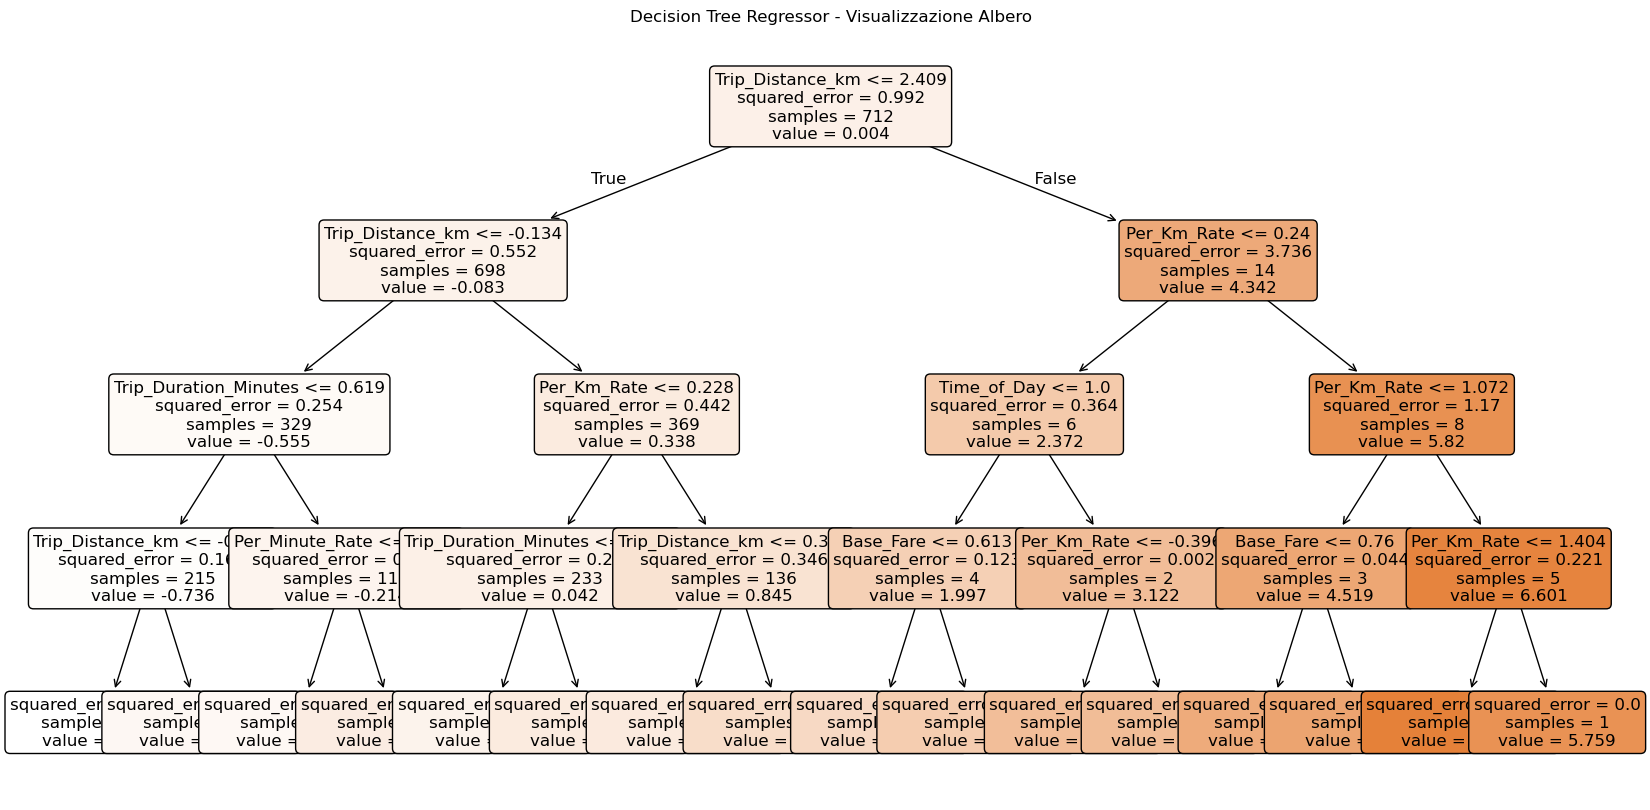

In [412]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(model_2,  
          filled=True,  
          feature_names=X_train.columns,  
          rounded=True,  
          fontsize=12)  
plt.title("Decision Tree Regressor - Visualizzazione Albero")
plt.show()

Feature importances:
[0.74081115 0.00283655 0.         0.         0.         0.
 0.00096078 0.1767357  0.02277572 0.05588009]


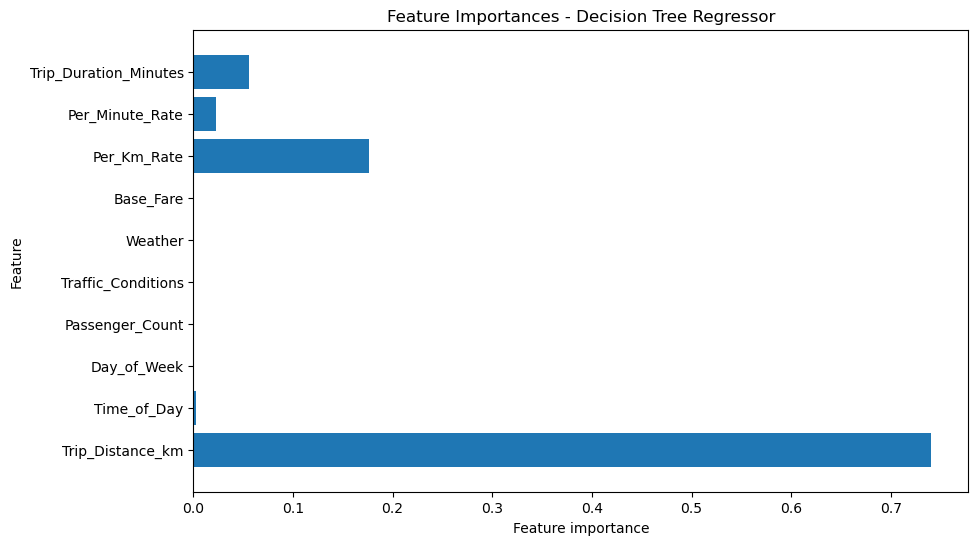

In [413]:
# Report the feature importances
print("Feature importances:")
print(model_2.feature_importances_)

# Function to plot feature importances
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)  # To visualize all the features
    plt.title("Feature Importances - Decision Tree Regressor")
    plt.show()

# Plot feature importances using the column labels of  X_train
plot_feature_importances(model_2, X_train.columns)

In [414]:
# Report delle feature importances con nomi
feature_importances = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": model_2.feature_importances_}
).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)


Feature Importances:
                 Feature  Importance
0       Trip_Distance_km    0.740811
7            Per_Km_Rate    0.176736
9  Trip_Duration_Minutes    0.055880
8        Per_Minute_Rate    0.022776
1            Time_of_Day    0.002837
6              Base_Fare    0.000961
2            Day_of_Week    0.000000
3        Passenger_Count    0.000000
4     Traffic_Conditions    0.000000
5                Weather    0.000000


### EXPLORATION OF THE IMPACT OF DEPTH ON TREE ACCURACY

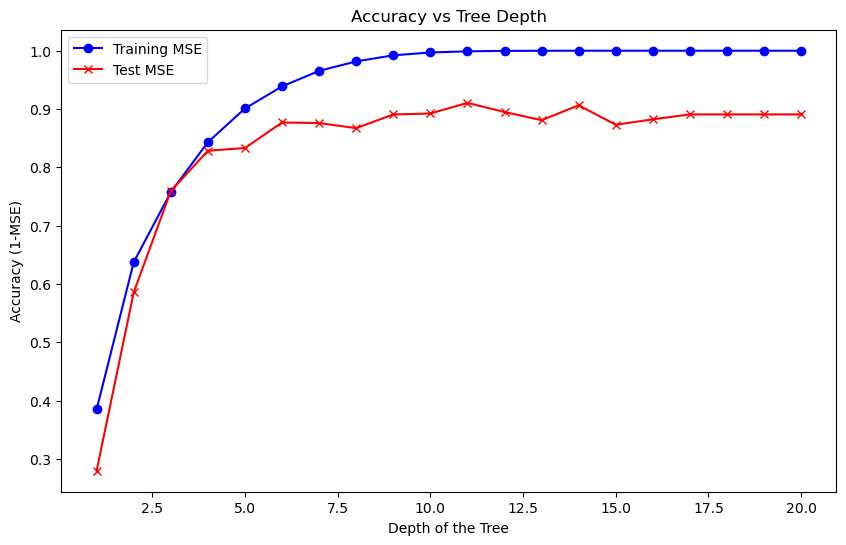

In [415]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the range of tree depths to test (from 1 to 20)
depths = range(1, 21)

# Lists to store the training and test MSE
train_accuracy = []
test_accuracy = []

# Train a model for each depth and calculate the MSE
for depth in depths:
    # Create the model with the specified depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Predict on the training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate the Mean Squared Error for training and test sets
    train_accuracy_value = 1- (mean_squared_error(y_train, train_pred))
    test_accuracy_value = 1-(mean_squared_error(y_test, test_pred))
    
    # Append the MSE values to the respective lists
    train_accuracy.append(train_accuracy_value)
    test_accuracy.append(test_accuracy_value)

# Plot the MSE vs. tree depth
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracy, label='Training MSE', color='blue', marker='o')
plt.plot(depths, test_accuracy, label='Test MSE', color='red', marker='x')

# Add labels and title
plt.xlabel('Depth of the Tree')
plt.ylabel('Accuracy (1-MSE)')
plt.title('Accuracy vs Tree Depth')
plt.legend()

# Show the plot
plt.show()


## Cost complexity pruning

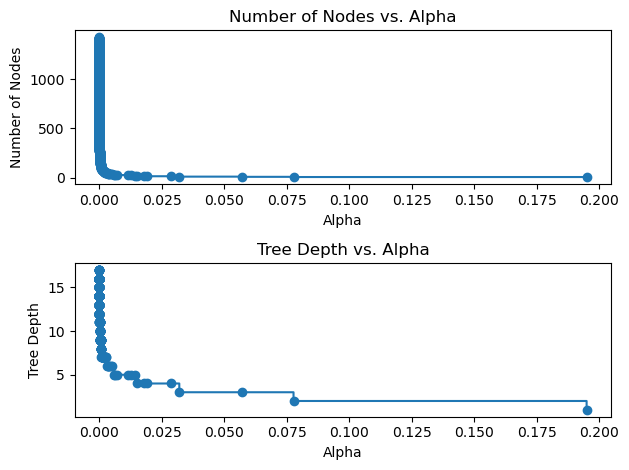

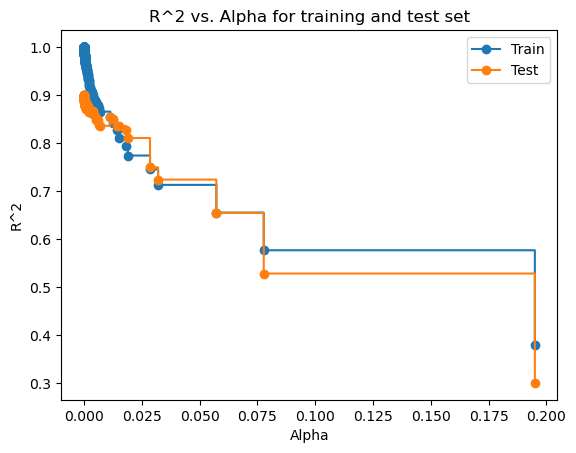

In [416]:

# Initialize the Regressor
tree = DecisionTreeRegressor(random_state=0)

# Set the possible values of alpha
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Some notes:
# alpha is the tuning parameter that penalizes complexity:
#     - A low alpha value allows the tree to have many leaves, potentially leading to overfitting.
#     - A higher alpha value leads to more pruning, simplifying the tree but potentially underfitting the model.

# Train different trees with different values of alpha
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# remove the trivial tree with one single node
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

# plot the number of nodes and tree depth for each single value of alpha
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs. Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Tree Depth")
ax[1].set_title("Tree Depth vs. Alpha")
fig.tight_layout()

# Performance of the models
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs. Alpha for training and test set")
ax.plot(ccp_alphas, train_scores, marker="o", label="Train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="Test", drawstyle="steps-post")
ax.legend()
plt.show()


it is clear to see that as the tuning parameter alpha increases, the tree becomes less complex: the depth is lower and the number of nodes is consequenlty smaller.

In [417]:
# Choose the tree with the optimal alpha 
optimal_alpha_index = np.argmax(test_scores) 
optimal_tree = trees[optimal_alpha_index]


In [418]:
# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(optimal_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(optimal_tree.score(X_test, y_test)))

# Tree details
print("Number of nodes: ", optimal_tree.tree_.node_count)
print("Tree depth: ", optimal_tree.tree_.max_depth)

#Impurity of Nodes and of Leaves 
impurity_values = optimal_tree.tree_.impurity
average_impurity = np.mean(impurity_values)

# Extract impurity values of only the leaf nodes
# Identify leaf nodes (leaf nodes have children_left and children_right as -1)
leaf_mask = (optimal_tree.tree_.children_left == -1) & (optimal_tree.tree_.children_right == -1)
leaf_impurity_values = impurity_values[leaf_mask]
average_leaf_impurity = np.mean(leaf_impurity_values)

# Print the average impurity
print("Average Impurity of the Tree nodes: {:.4f}".format(average_impurity))
print("Average Impurity of Leaf Nodes: {:.4f}".format(average_leaf_impurity))

Accuracy on training set: 0.992
Accuracy on test set: 0.899
Number of nodes:  317
Tree depth:  12
Average Impurity of the Tree nodes: 0.0548
Average Impurity of Leaf Nodes: 0.0065


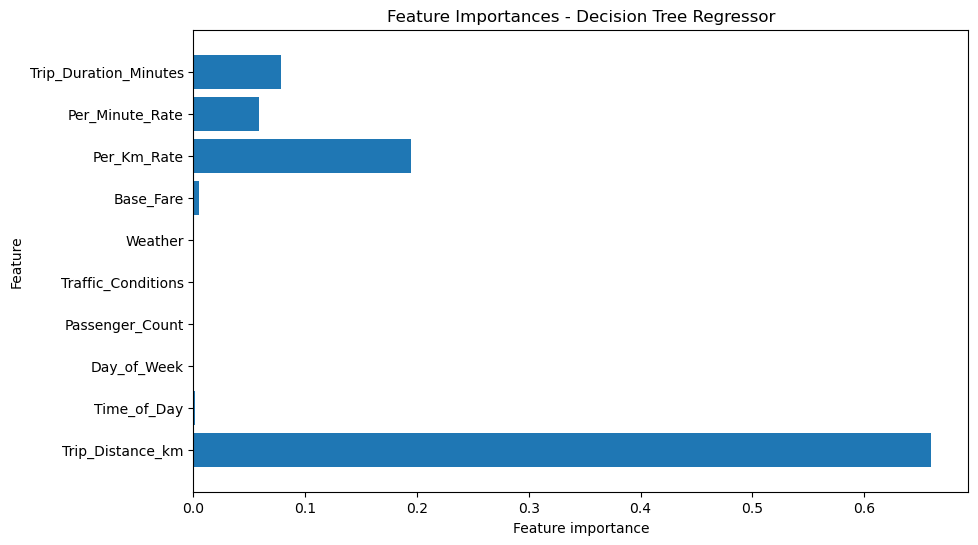

In [419]:
plot_feature_importances(optimal_tree,X_train.columns)

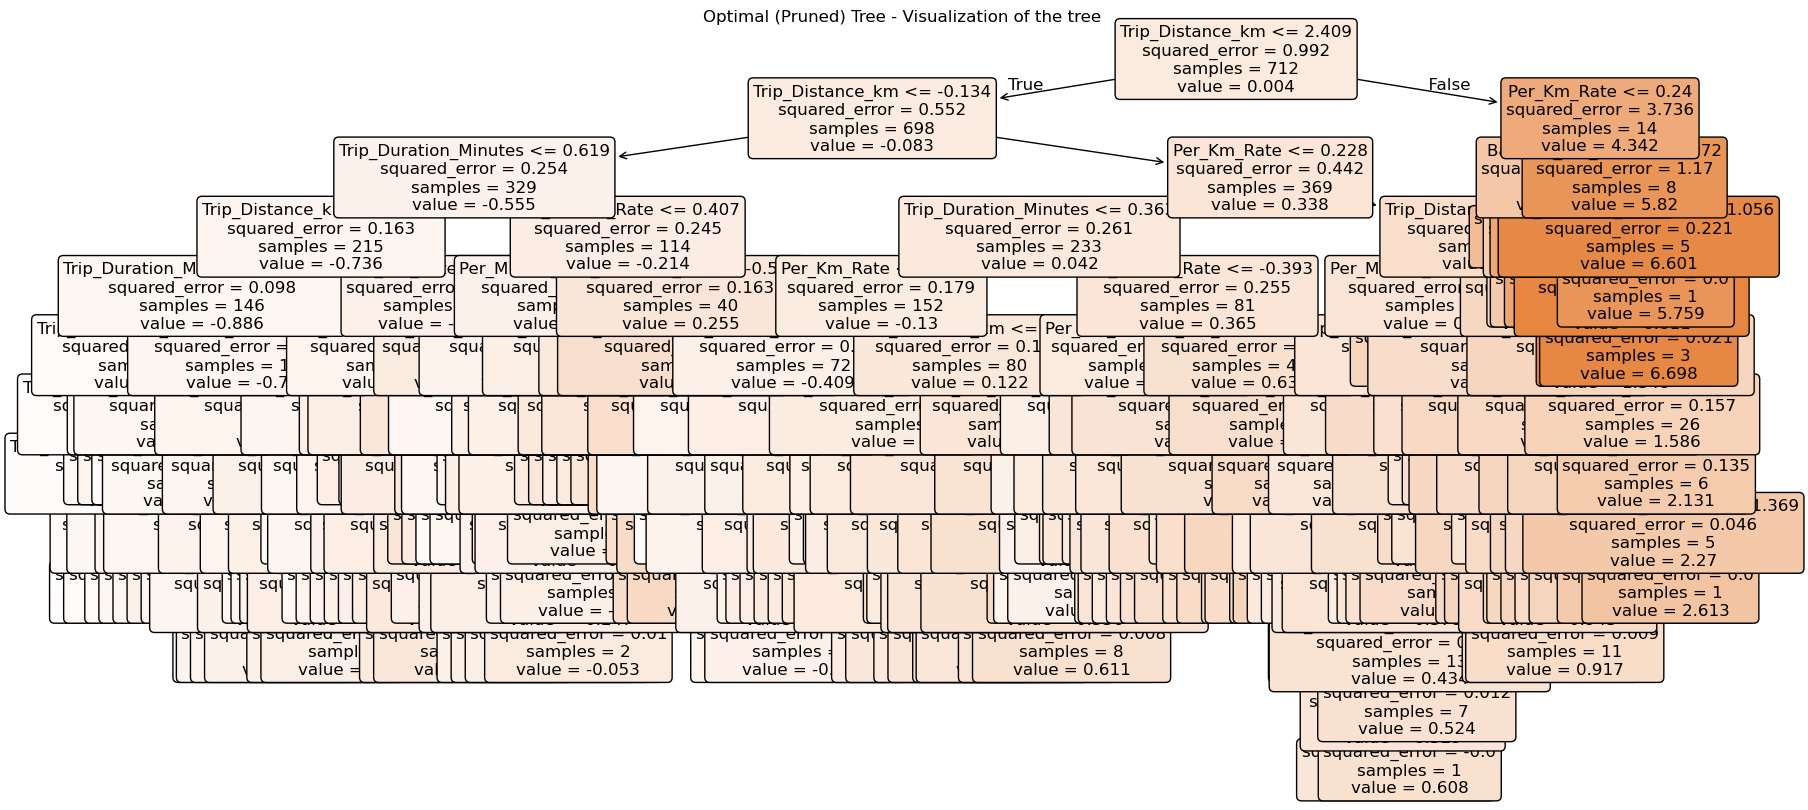

In [420]:

# Visualize the decision tree
plt.figure(figsize=(20, 10)) 
plot_tree(optimal_tree,  
          filled=True,  
          feature_names=X_train.columns, 
          rounded=True,  
          fontsize=12)  #to set up font dimension
plt.title("Optimal (Pruned) Tree - Visualization of the tree")
plt.show()

## Random Forests

In [421]:
from sklearn.ensemble import RandomForestRegressor

In [422]:
# Initialize and train Random Forest Regressor
forest = RandomForestRegressor(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=5, random_state=0)

In [423]:
# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.940


In [424]:
# Get the number of trees in the forest
num_trees = len(forest.estimators_)

# Get the depth of each tree
tree_depths = [tree.get_depth() for tree in forest.estimators_]
average_depth = np.mean(tree_depths)


# Initialize lists to store impurity values
all_impurities = []
all_leaf_impurities = []

# Loop through each tree in the forest
for tree in forest.estimators_:
    impurity_values = tree.tree_.impurity  # Get impurity of all nodes
    
    # Identify leaf nodes (nodes where both left and right children are -1)
    leaf_mask = (tree.tree_.children_left == -1) & (tree.tree_.children_right == -1)
    leaf_impurity_values = impurity_values[leaf_mask]  # Get only leaf node impurities

    # Append to lists
    all_impurities.append(np.mean(impurity_values))
    all_leaf_impurities.append(np.mean(leaf_impurity_values))

# Compute average impurity across all trees
average_tree_impurity = np.mean(all_impurities)
average_leaf_impurity = np.mean(all_leaf_impurities)

# Print the results
print(f'Number of Trees of the forest: {num_trees}')
print(f'Average Depth of the Trees of the forest: {average_depth}')
print("Average Impurity of All Trees' Nodes: {:.4f}".format(average_tree_impurity))
print("Average Impurity of Leaf Nodes Across Trees: {:.4f}".format(average_leaf_impurity))


Number of Trees of the forest: 5
Average Depth of the Trees of the forest: 16.4
Average Impurity of All Trees' Nodes: 0.0159
Average Impurity of Leaf Nodes Across Trees: -0.0000


In [425]:
print(X_train.iloc[:, 0])

331    0.685354
733    0.656969
382    0.703282
704    1.009543
813   -0.647753
         ...   
106    0.667925
270   -1.240355
860   -0.597456
435    0.122133
102    0.658961
Name: Trip_Distance_km, Length: 712, dtype: float64


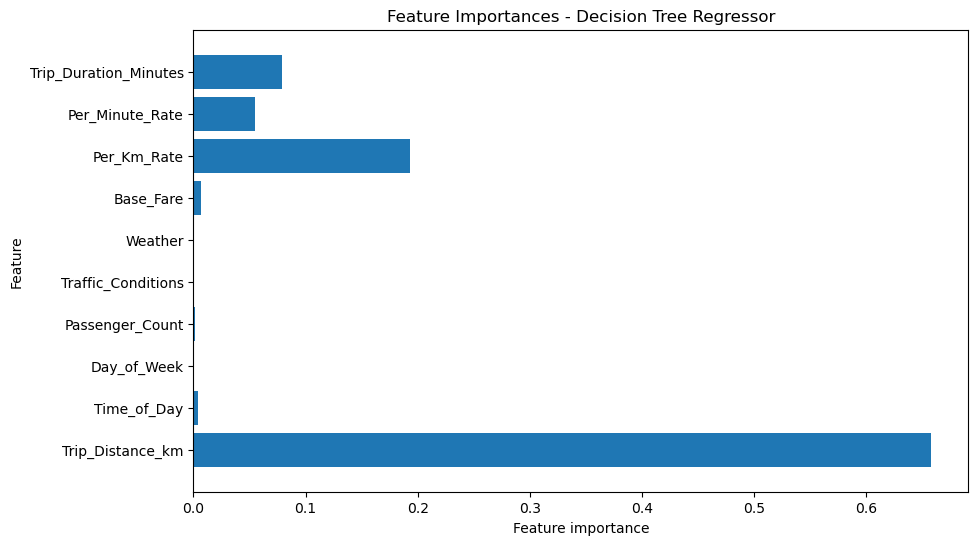

In [426]:
plot_feature_importances(forest,X_train.columns)

In [427]:
# Report delle feature importances con nomi
feature_importances = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": forest.feature_importances_}
).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                 Feature  Importance
0       Trip_Distance_km    0.658028
7            Per_Km_Rate    0.193421
9  Trip_Duration_Minutes    0.079409
8        Per_Minute_Rate    0.054816
6              Base_Fare    0.006427
1            Time_of_Day    0.004069
3        Passenger_Count    0.001625
4     Traffic_Conditions    0.000933
5                Weather    0.000766
2            Day_of_Week    0.000506


### Gradient Boosting

In [428]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbrt_1 = GradientBoostingRegressor(random_state=0)

# Fit the model
gbrt_1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_1.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.969


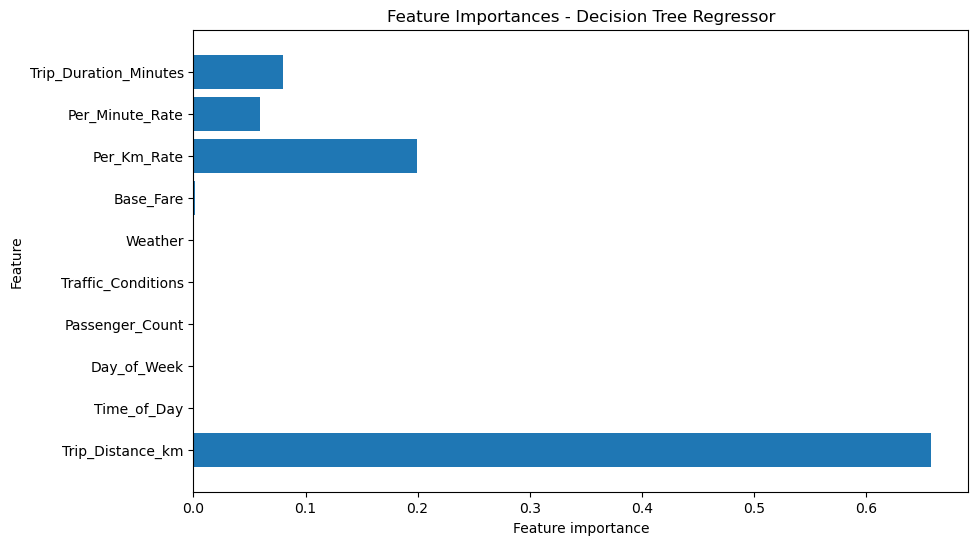

In [429]:
plot_feature_importances(gbrt_1,X_train.columns)

In [430]:
print(f"Number of trees trained: {len(gbrt_1.estimators_)}") 
depths = [tree[0].get_depth() for tree in gbrt_1.estimators_]
print(f"Average depth: {sum(depths) / len(depths)}")
print(f"min depth: {min(depths)}, max depth: {max(depths)}")


Number of trees trained: 100
Average depth: 3.0
min depth: 3, max depth: 3


In [431]:
# Get all the individual trees (estimators) in the Gradient Boosting model
trees = gbrt_1.estimators_

# Store impurities for all nodes and leaf nodes
all_impurities = []
leaf_impurities = []

# Loop through all trees (GradientBoostingRegressor uses multiple trees)
for tree in trees[:, 0]:  # Extract the first estimator from each stage
    impurities = tree.tree_.impurity
    all_impurities.extend(impurities)  # Collect all node impurities
    
    # Identify leaf nodes (children_left and children_right = -1)
    leaf_mask = (tree.tree_.children_left == -1) & (tree.tree_.children_right == -1)
    leaf_impurities.extend(impurities[leaf_mask])  # Collect leaf node impurities

# Compute the average impurity for nodes and leaf nodes
avg_node_impurity = np.mean(all_impurities)
avg_leaf_impurity = np.mean(leaf_impurities)

# Print results
print("Average Impurity of All Nodes: {:.4f}".format(avg_node_impurity))
print("Average Impurity of Leaf Nodes: {:.4f}".format(avg_leaf_impurity))

Average Impurity of All Nodes: 0.0605
Average Impurity of Leaf Nodes: 0.0356


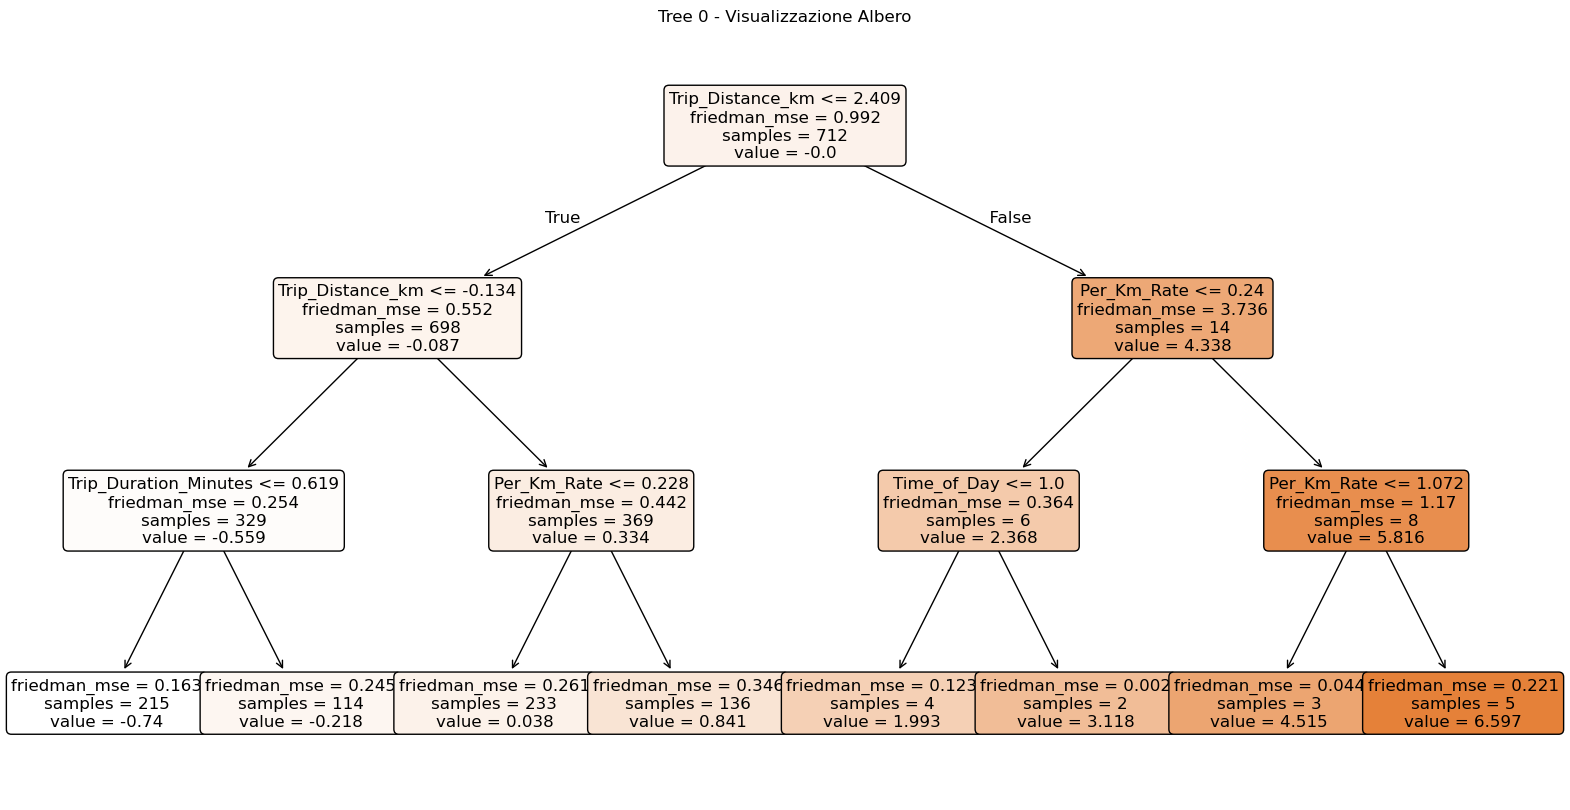

In [432]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_index = 0  # Change this to visualize different trees in the ensemble

plt.figure(figsize=(20, 10))
plot_tree(gbrt_1.estimators_[tree_index, 0],  # Access the first tree (for one output)
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12)
plt.title(f"Tree {tree_index} - Visualizzazione Albero")
plt.show()


In [433]:
# Set a specific learning rate
gbrt_2 = GradientBoostingRegressor(random_state=0, learning_rate=0.6)
gbrt_2.fit(X_train, y_train)

print("Accuracy on training set (learning rate = 0.6): {:.3f}".format(gbrt_2.score(X_train, y_train)))
print("Accuracy on test set (learning rate = 0.6): {:.3f}".format(gbrt_2.score(X_test, y_test)))

Accuracy on training set (learning rate = 0.6): 0.999
Accuracy on test set (learning rate = 0.6): 0.962


In [434]:
# Get all the individual trees (estimators) in the Gradient Boosting model
trees = gbrt_2.estimators_

# Store impurities for all nodes and leaf nodes
all_impurities = []
leaf_impurities = []

# Loop through all trees (GradientBoostingRegressor uses multiple trees)
for tree in trees[:, 0]:  # Extract the first estimator from each stage
    impurities = tree.tree_.impurity
    all_impurities.extend(impurities)  # Collect all node impurities
    
    # Identify leaf nodes (children_left and children_right = -1)
    leaf_mask = (tree.tree_.children_left == -1) & (tree.tree_.children_right == -1)
    leaf_impurities.extend(impurities[leaf_mask])  # Collect leaf node impurities

# Compute the average impurity for nodes and leaf nodes
avg_node_impurity = np.mean(all_impurities)
avg_leaf_impurity = np.mean(leaf_impurities)

# Print results
print("Average Impurity of All Nodes: {:.4f}".format(avg_node_impurity))
print("Average Impurity of Leaf Nodes: {:.4f}".format(avg_leaf_impurity))


Average Impurity of All Nodes: 0.0158
Average Impurity of Leaf Nodes: 0.0096


In [435]:
print(f"Number of trees trained: {len(gbrt_2.estimators_)}")
depths = [tree[0].get_depth() for tree in gbrt_3.estimators_]
print(f"Average depth: {sum(depths) / len(depths)}")
print(f"min depth: {min(depths)}, max depth: {max(depths)}")

Number of trees trained: 100
Average depth: 3.0
min depth: 3, max depth: 3


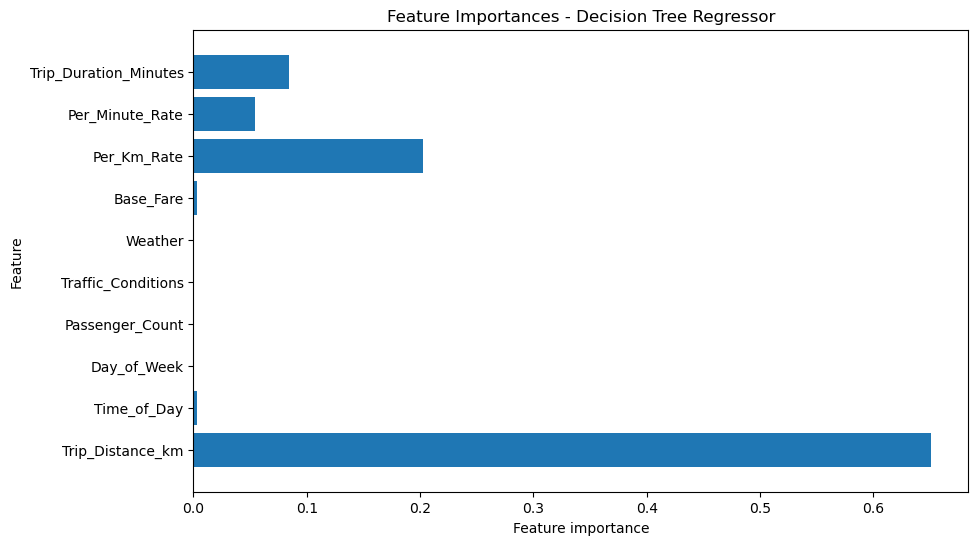

In [436]:
plot_feature_importances(gbrt_2,X_train.columns)

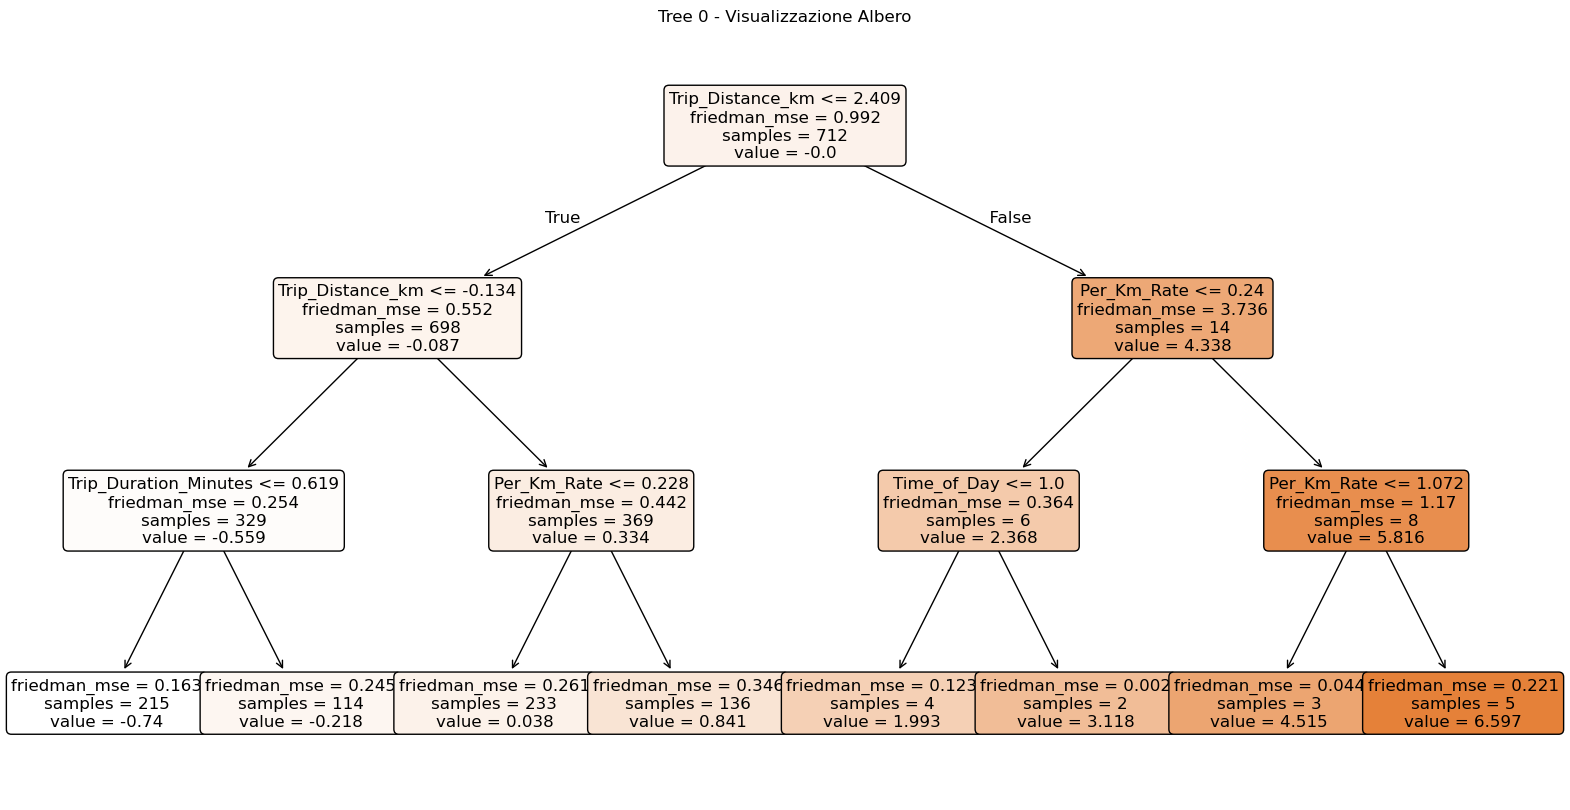

In [437]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_index = 0  # Change this to visualize different trees in the ensemble

plt.figure(figsize=(20, 10))
plot_tree(gbrt_2.estimators_[tree_index, 0],  # Access the first tree (for one output)
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12)
plt.title(f"Tree {tree_index} - Visualizzazione Albero")
plt.show()

In [438]:
# Set a specific learning rate
gbrt_3 = GradientBoostingRegressor(random_state=0, n_estimators=200)
gbrt_3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt_3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_3.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.972


In [439]:
# Get all the individual trees (estimators) in the Gradient Boosting model
trees = gbrt_3.estimators_

# Store impurities for all nodes and leaf nodes
all_impurities = []
leaf_impurities = []

# Loop through all trees (GradientBoostingRegressor uses multiple trees)
for tree in trees[:, 0]:  # Extract the first estimator from each stage
    impurities = tree.tree_.impurity
    all_impurities.extend(impurities)  # Collect all node impurities
    
    # Identify leaf nodes (children_left and children_right = -1)
    leaf_mask = (tree.tree_.children_left == -1) & (tree.tree_.children_right == -1)
    leaf_impurities.extend(impurities[leaf_mask])  # Collect leaf node impurities

# Compute the average impurity for nodes and leaf nodes
avg_node_impurity = np.mean(all_impurities)
avg_leaf_impurity = np.mean(leaf_impurities)

# Print results
print("Average Impurity of All Nodes: {:.4f}".format(avg_node_impurity))
print("Average Impurity of Leaf Nodes: {:.4f}".format(avg_leaf_impurity))

Average Impurity of All Nodes: 0.0319
Average Impurity of Leaf Nodes: 0.0189


In [440]:
print(f"Number of trees trained: {len(gbrt_3.estimators_)}")
depths = [tree[0].get_depth() for tree in gbrt_4.estimators_]
print(f"Average depth: {sum(depths) / len(depths)}")
print(f"min depth: {min(depths)}, max depth: {max(depths)}")

Number of trees trained: 200
Average depth: 3.0
min depth: 3, max depth: 3
